# Cadences with Radar Plots

* Create two kinds of radar plots:  by Tone (just the final of the cadences), or Combined_Types (with final and type of cadence).




In [8]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from pyvis.network import Network
import glob as glob
import os
from IPython.display import SVG
import plotly.graph_objects as go
import plotly.offline as pyo

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


In [9]:

### The Functions.  Do not Edit!

def createRadarElement(one_row_df):
    return go.Scatterpolar(
        r = one_row_df.iloc[0].tolist() + [one_row_df.iloc[0].tolist()[0]], 
        theta = one_row_df.columns.values.tolist() + [one_row_df.columns.values.tolist()[0]], 
        mode = 'lines')

# for a corpus:

def create_radar_plots(list_of_pieces, features): 
    data = []
    names = ""
    for work in corpus_list:
        piece = importScore(work)
        cadences = piece.cadences()
        if len(cadences) == 0:
            print("No cadences found in the piece")
        if plot_type == "Tone":
            cadences["Combined_Type"] = cadences["Tone"]
        else:
            cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
            
        grouped_combined = pd.DataFrame(cadences.groupby(['Combined_Type']).size().reset_index(name='counts'))
        graph_df = pd.DataFrame(columns=grouped_combined["Combined_Type"].tolist())
        graph_df.loc[0] = grouped_combined["counts"].tolist()

        local_data = createRadarElement(graph_df)
        local_data.name = piece.metadata['title']
        data.append(local_data)
        names += ("\n" + (piece.metadata['composer'] + ": " + piece.metadata['title']))
    fig = go.Figure(data, )
    title = "Pieces: \n" + names
    fig.update_layout(title_text=title)
    fig.show(renderer='svg')

# for just one piece

def create_radar_plot(piece, features): 
    cadences = piece.cadences()
    if len(cadences) == 0:
        print("No cadences found in the piece")
        return None
    if plot_type == "Tone":
        cadences["Combined_Type"] = cadences["Tone"]
    else:
        cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
    grouped_combined = pd.DataFrame(cadences.groupby(['Combined_Type']).size().reset_index(name='counts'))
    graph_df = pd.DataFrame(columns=grouped_combined["Combined_Type"].tolist())
    graph_df.loc[0] = grouped_combined["counts"].tolist()

    data = createRadarElement(graph_df)
    data.name = piece.metadata['title']
    fig = go.Figure(data, )
    title = piece.metadata['composer'] + ": " + piece.metadata['title']
    fig.update_layout(title_text=title)
    fig.show(renderer='svg')

### Load One Piece

In [10]:
# Select a prefix:
prefix = 'https://crimproject.org/mei/'
# prefix = 'Music_Files/'
# just add the CRIM Piece ID here
mei_file = 'CRIM_Model_0001.mei'


# combine strings and import
url = prefix + mei_file
piece = importScore(url)
print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Model_0001.mei
{'title': 'Veni speciosam', 'composer': 'Johannes Lupi'}


### Select Plot Type

`plot_type = "Tone"`

or

`plot_type = "Combined_Type"`

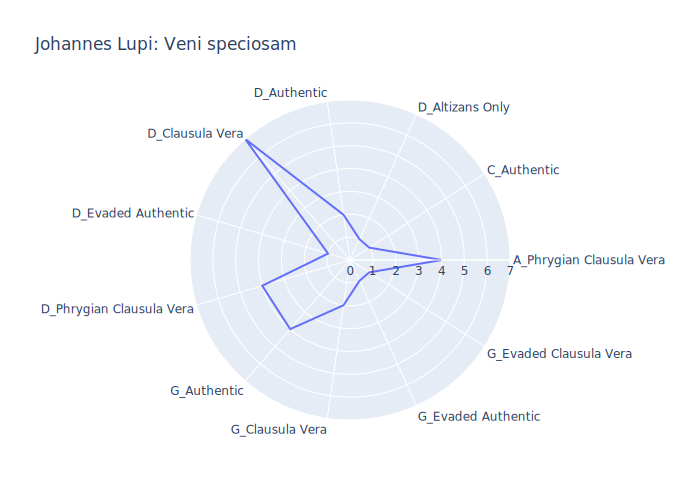

In [12]:

# select Plot Type:  'Tone' or "Combined_Types"

plot_type = "Combined_Type"


#
features = "Combined_Type"
cadences = piece.cadences().fillna('')
if plot_type == "Tone":
    cadences["Combined_Type"] = cadences["Tone"]
else:
    cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
grouped_combined = cadences.groupby(["Combined_Type"]).size().reset_index(name='counts')
create_radar_plot(piece, features)



In [13]:
cadences

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext,Combined_Type
48.0,Authentic,0.0,TCB,G3,P1,G,P8,4/2,7,1.0,4.0,0.044776,48.0,16.0,G_Authentic
64.0,,,Cu,F3,-M2,D,P5,4/2,9,1.0,3.0,0.059701,16.0,12.0,D_
76.0,Clausula Vera,0.0,CT,D3,-P4,D,P5,4/2,10,3.0,5.0,0.070896,12.0,8.0,D_Clausula Vera
84.0,Clausula Vera,0.0,CT,C4,P4,D,P5,4/2,11,3.0,4.0,0.078358,8.0,76.0,D_Clausula Vera
160.0,Phrygian Clausula Vera,1.0,CT,D3,-P4,D,P5,4/2,21,1.0,4.0,0.149254,76.0,28.0,D_Phrygian Clausula Vera
188.0,Clausula Vera,0.0,CTx,C4,P4,D,P5,4/2,24,3.0,4.0,0.175373,28.0,20.0,D_Clausula Vera
208.0,,,cT,D3,-P4,,,4/2,27,1.0,5.0,0.194030,20.0,8.0,_
216.0,Authentic,1.0,CTB,G3,P1,G,P8,4/2,28,1.0,5.0,0.201493,8.0,40.0,G_Authentic
256.0,,,Cu,F3,-M2,D,P5,4/2,33,1.0,5.0,0.238806,40.0,24.0,D_
280.0,Phrygian Clausula Vera,1.0,CT,A3,M2,A,M2,4/2,36,1.0,4.0,0.261194,24.0,4.0,A_Phrygian Clausula Vera


### On a Corpus of Pieces (from URLs)

* Create Piece List:

See **corpus methods** for ways to build a corpus of pieces from CRIM or your own repository

               
* Select plot type:


> `plot_type = "Tone"` or  `plot_type = "Combined_Type"`

In [15]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0001"  # <==  put your model number here!
mass_id = "0002" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list

['https://crimproject.org/mei/CRIM_Model_0001.mei',
 'https://crimproject.org/mei/CRIM_Mass_0002_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0002_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0002_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0002_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0002_5.mei']

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


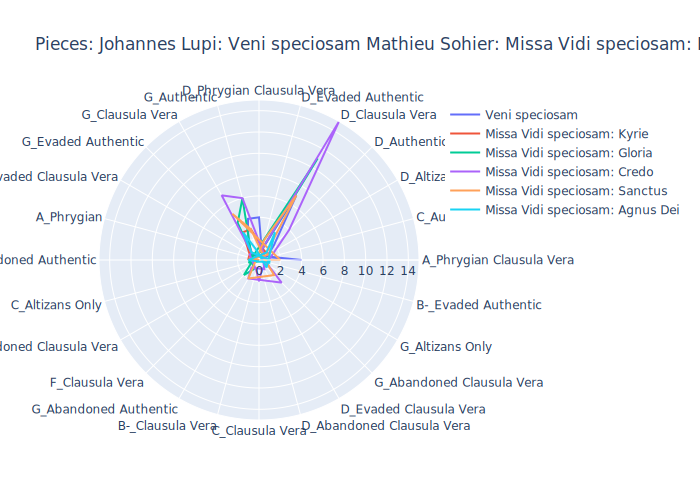

In [17]:


# Make the corpus cadence plot here
# select Plot Type:  'Tone' or "Combined Types"

plot_type = "Combined Types"

create_radar_plots(corpus_list, plot_type)

In [28]:
# complete table of corpus cadences
corpus  = CorpusBase(corpus_list)
func = ImportedPiece.cadences
list_of_dfs = corpus.batch(func=func, kwargs={'keep_keys': True}, metadata=True)
combined_df = pd.concat(list_of_dfs, ignore_index=False)


combined_df['Validation'] = ""
combined_df['Comments'] = ""
col_list = ['Composer', 'Title', 'Measure', 'Beat', 'Pattern', 'Key', 'CadType', 'Tone','CVFs',
                'LeadingTones', 'Sounding', 'Low','RelLow','RelTone',
                'Progress','SinceLast','ToNext', 'Validation', 'Comments']
combined_df = combined_df[col_list]
combined_df

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


,Composer,Title,Measure,Beat,Pattern,Key,CadType,Tone,CVFs,LeadingTones,Sounding,Low,RelLow,RelTone,Progress,SinceLast,ToNext,Validation,Comments
48.0,Johannes Lupi,Veni speciosam,7,1.0,BC2,^BC(2|4)x?z?$,Authentic,G,TCB,0.0,4.0,G3,P1,P8,0.044776,48.0,16.0,,
64.0,Johannes Lupi,Veni speciosam,9,1.0,C2u-2,C2u-2,NaN,D,Cu,NaN,3.0,F3,-M2,P5,0.059701,16.0,12.0,,
76.0,Johannes Lupi,Veni speciosam,10,3.0,C2T-2,^C(2|4)T-2x?z?$,Clausula Vera,D,CT,0.0,5.0,D3,-P4,P5,0.070896,12.0,8.0,,
84.0,Johannes Lupi,Veni speciosam,11,3.0,C2T-2,^C(2|4)T-2x?z?$,Clausula Vera,D,CT,0.0,4.0,C4,P4,P5,0.078358,8.0,76.0,,
160.0,Johannes Lupi,Veni speciosam,21,1.0,C2T-1,^C(2|3|4)T-1z?$,Phrygian Clausula Vera,D,CT,1.0,4.0,D3,-P4,P5,0.149254,76.0,28.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488.0,Mathieu Sohier,Missa Vidi speciosam: Agnus Dei,61,1.0,C2x,^C(2|4)xz?$,Abandoned Authentic,D,Cxx,0.0,2.0,B-3,m6,P8,0.847222,16.0,8.0,,
496.0,Mathieu Sohier,Missa Vidi speciosam: Agnus Dei,62,1.0,T-1c-2,T-1c-2,NaN,NaN,Tc,NaN,6.0,F3,m3,NaN,0.861111,8.0,8.0,,
504.0,Mathieu Sohier,Missa Vidi speciosam: Agnus Dei,63,1.0,BC2,^BC(2|4)x?z?$,Authentic,D,CTB,0.0,4.0,D3,P1,P8,0.875000,8.0,20.0,,
524.0,Mathieu Sohier,Missa Vidi speciosam: Agnus Dei,65,3.0,c-1x,^c-(1|2)xz?$,Abandoned Authentic,NaN,cx,-1.0,4.0,E3,M2,NaN,0.909722,20.0,28.0,,
